## Загрузка библиотек

In [1]:
import pandas as pd

## Загрузка данных

### Задание 1 (0.5 балла)

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [2]:
def read_covid_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    df = pd.read_csv(path_to_csv)
    X = df
    y = None
    return X, y


def read_hr_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    df = pd.read_csv(path_to_csv)
    X = df.drop(columns=['target'])
    y = df['target']
    return X, y

In [3]:
COVID_DATA_PATH = 'covid.csv'
HR_DATA_PATH = 'hr.csv'

In [4]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

In [5]:
X_hr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8


## EDA

### Задание 2 (3.5 балла)

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

#### 1. (0.5 балла)

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

> для определенности скажу, что считаю числовыми признаками только те, которые в сыром виде готовы для подачи на вход модели: то есть если такие числовые по смыслу признаки, среди которых будет встречаться значение типа `>20`, в этом пункте я обработаю как категориальные

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

numeric_data = X_hr.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

categorical = list(X_hr.dtypes[X_hr.dtypes == "object"].index)

In [7]:
numeric_features

Index(['enrollee_id', 'city_development_index', 'training_hours'], dtype='object')

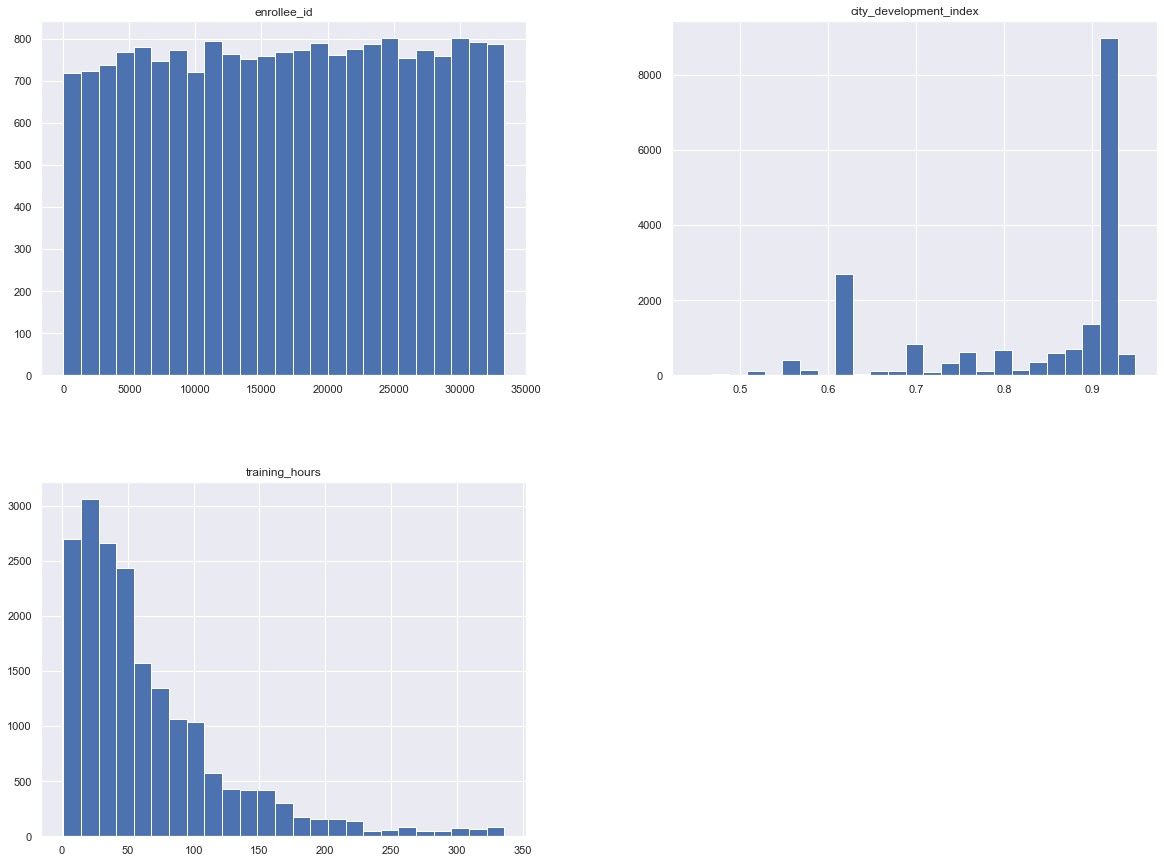

In [8]:
X_hr[numeric_features].hist(bins=25, figsize=(20,15))
plt.show()

In [9]:
for feature in categorical:
    print('> distribution for feature:', feature, end='\n\n')
    print(X_hr[feature].value_counts()[:5], end='\n\n')

> distribution for feature: city

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
Name: city, dtype: int64

> distribution for feature: gender

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

> distribution for feature: relevent_experience

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

> distribution for feature: enrolled_university

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

> distribution for feature: education_level

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

> distribution for feature: major_discipline

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
Name: major_discipline, dtype: int64

> distri

#### 2. (0.5 балла)
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [10]:
print(f'Исходный размер датасета hr {X_hr.shape}')

Исходный размер датасета hr (19158, 13)


In [11]:
X_hr_dropna = X_hr.dropna()

In [12]:
print(f'Pазмер датасета hr без NaN {X_hr_dropna.shape}')

Pазмер датасета hr без NaN (8955, 13)


> Датасет исхудал вдвое

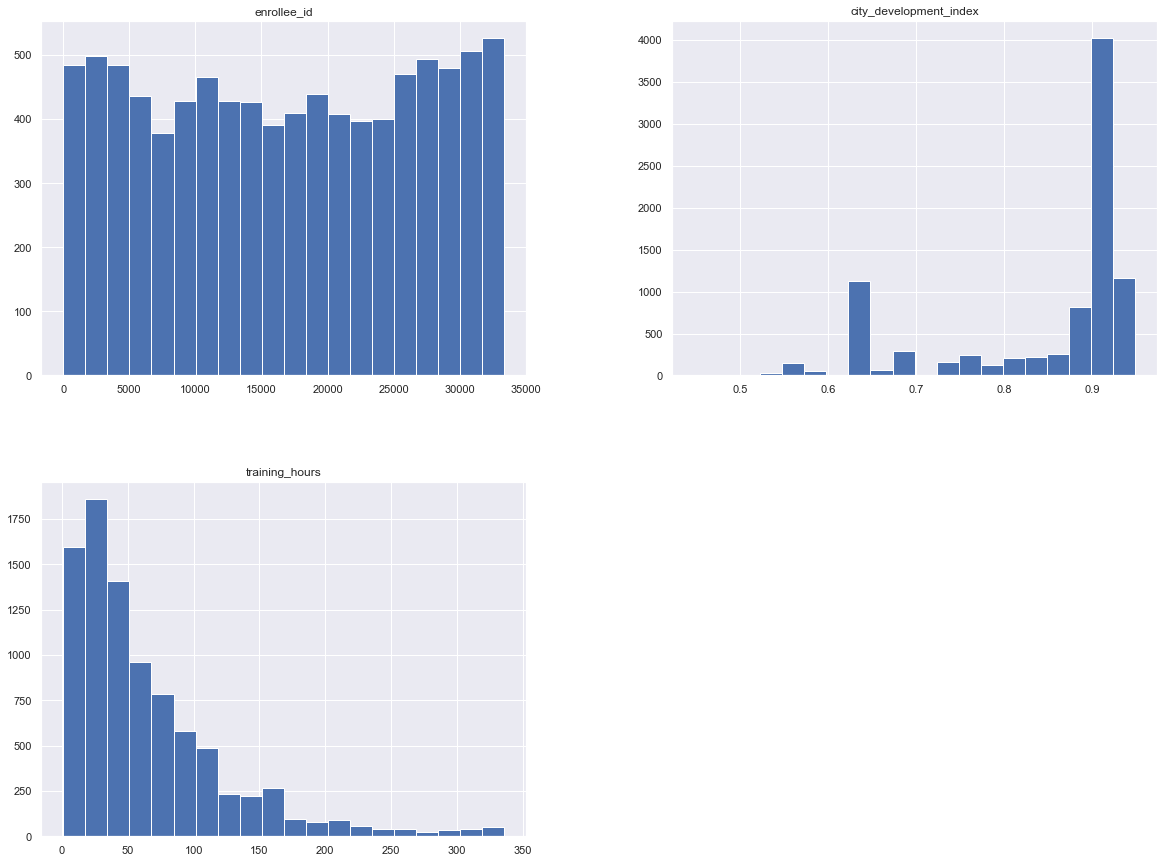

In [13]:
X_hr_dropna[numeric_features].hist(bins=20, figsize=(20,15))
plt.show()

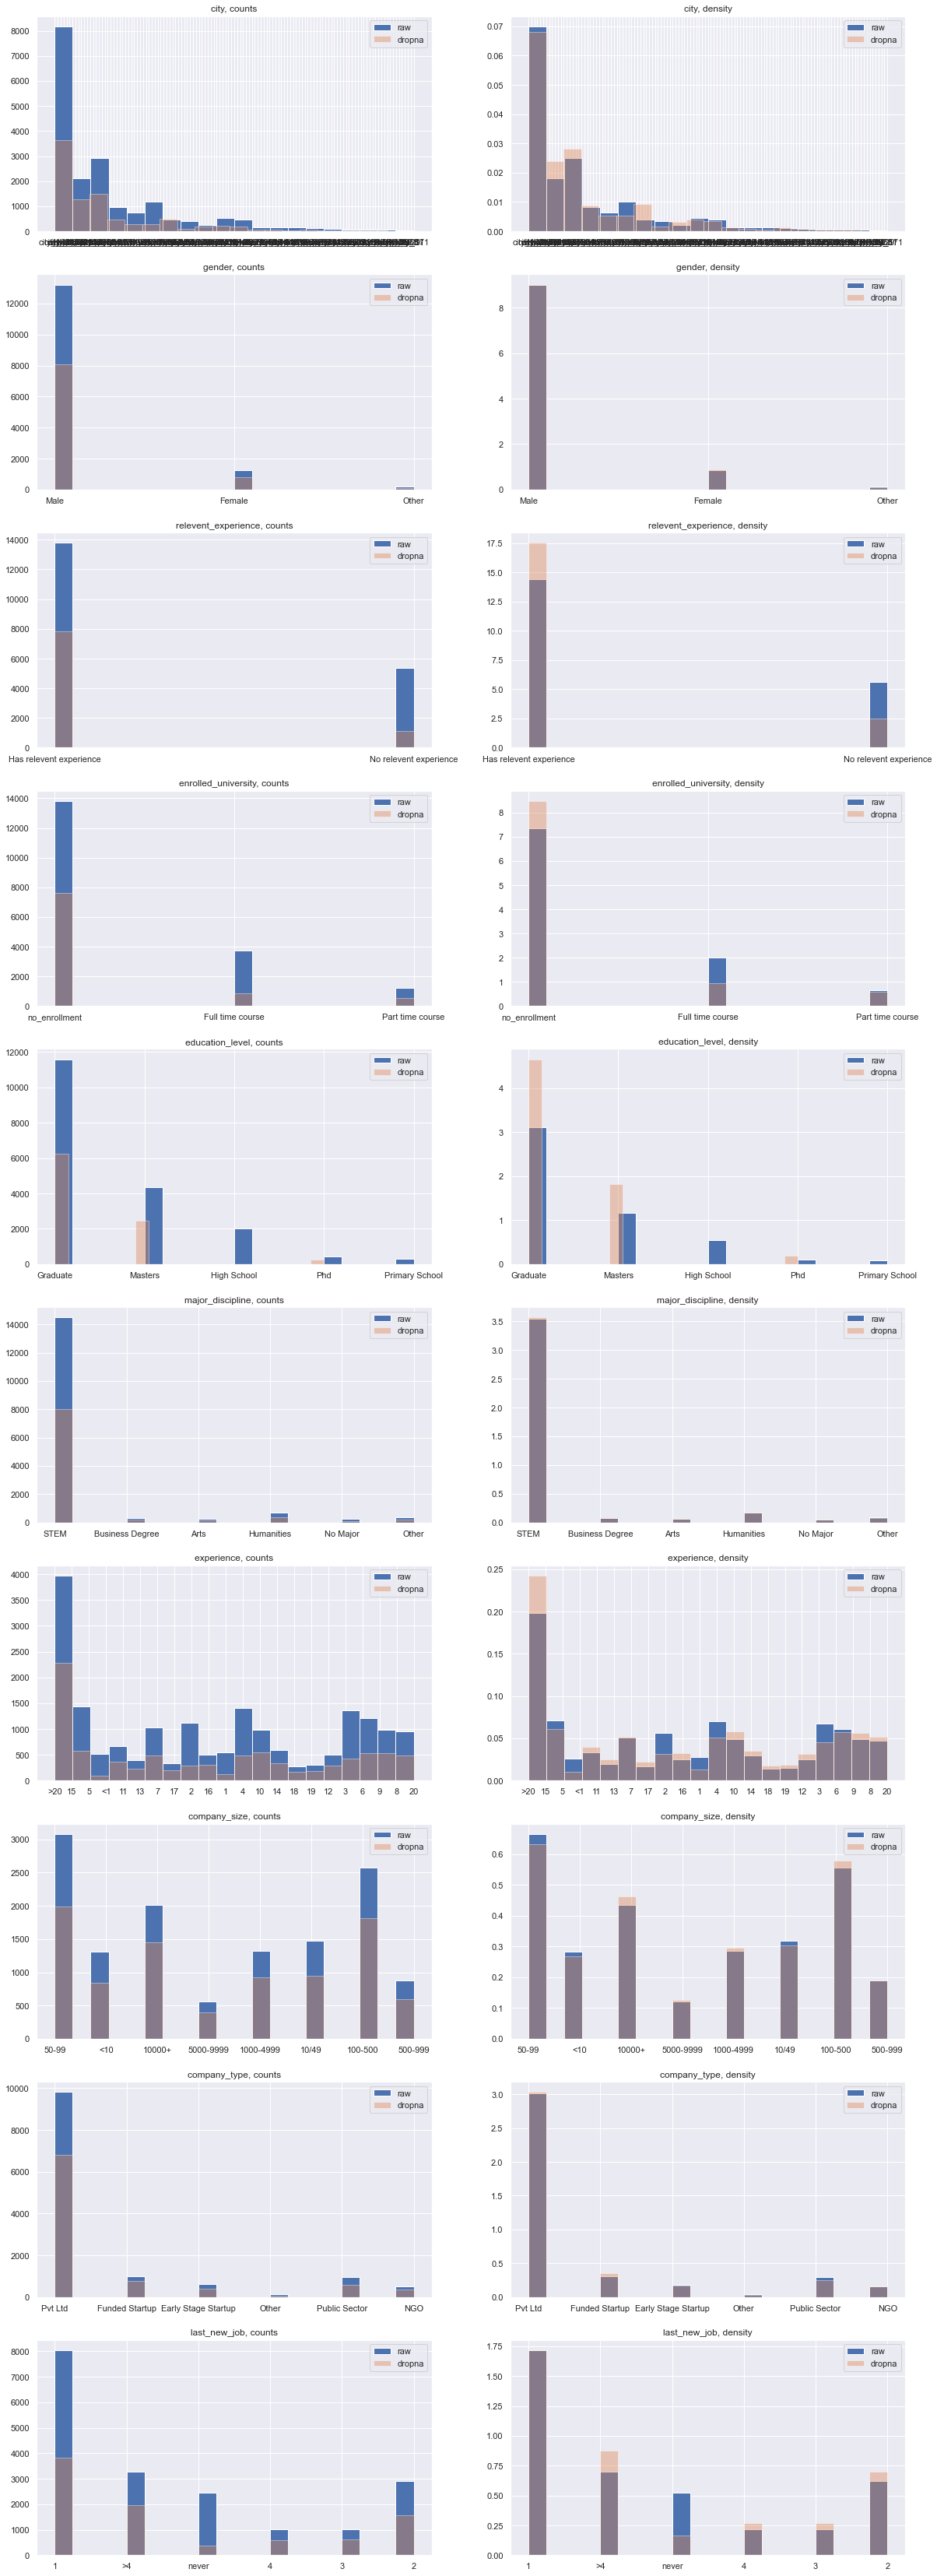

In [14]:
fig, axs = plt.subplots(10, 2, figsize=(20, 60))
axs = axs.ravel()

for idx, ax in enumerate(axs):
    if idx % 2:
        density = True
        hist_type = ', density'
    else: 
        density = False
        hist_type = ', counts'
    
    i = int(idx / 2) 
    ax.hist(X_hr[categorical[i]].dropna(), bins=20, label='raw', density=density)
    ax.hist(X_hr_dropna[categorical[i]], bins=20, label='dropna', density=density, alpha=.4)
    ax.set_title(categorical[i]+hist_type)
    ax.legend()
plt.show()

In [15]:
X_hr.education_level.value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [16]:
X_hr_dropna.education_level.value_counts()

Graduate    6252
Masters     2449
Phd          254
Name: education_level, dtype: int64

> Распределения по числовым признакам не поменялись, по категориальным практически тоже, за исключением малоопытных объектов: из графы education_level пропали все школьники, в долевом отношении значительно поменялись распределения по experience и enrollment - выходит что меньше всего данных по молодым и свежим на рынке труда; также пропали редкие города

Давайте попробуем избежать сокращения размера датасета.

> Отобразим пропуски вообще

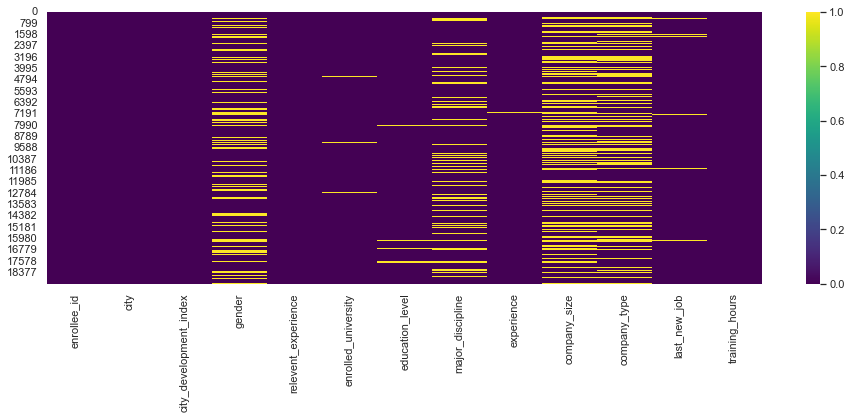

In [17]:
plt.figure(figsize = (16,5))
ax = sns.heatmap(X_hr.isna(), cmap='viridis')

In [18]:
y_hr.isna().sum()

0

#### 3.  (1 балл)
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

> заполнил бы медианой для большей устойчивости, но в численных признаках нет пропусков

In [19]:
numeric_data_median = numeric_data.median()
X_hr = X_hr.fillna(numeric_data_median)

#### 4.  (1 балл)
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

_Ваш ответ:_ поскольку я заметил, что сильно меняется распределение для неопытных людей, кажется стоит создать отдельную категорию для пропущенных значений

> Заполнять nan в таргете? В нашем датасете пропусков нет, но если бы были, я бы скорее выкинул объекты без целевой переменной...

In [20]:
fraction = X_hr.isna().sum() / len(X_hr)
fraction

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
dtype: float64

In [21]:
X_hr.shape

(19158, 13)

> думаю можно удалить объекты с пропусками в `last_new_job`, `education_level`  и `enrolled_university` - в них меньше трёх процентов пропусков

In [22]:
def fill_na(X, y):
    # Возвращает данные без NaN значений 
    categorical = list(X.dtypes[X.dtypes == 'object'].index)
    
    fraction = X.isna().sum()
    X = X.dropna(subset=X.columns[fraction < 0.03])
    
    X[categorical] = X[categorical].fillna('NotGiven')
    
    X_fill = X.copy()
    y_fill = y.copy()
    return X_fill, y_fill

In [23]:
X_hr_fill, y_hr_fill = fill_na(X_hr, y_hr)

#### 5.  (0.5 балла)
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

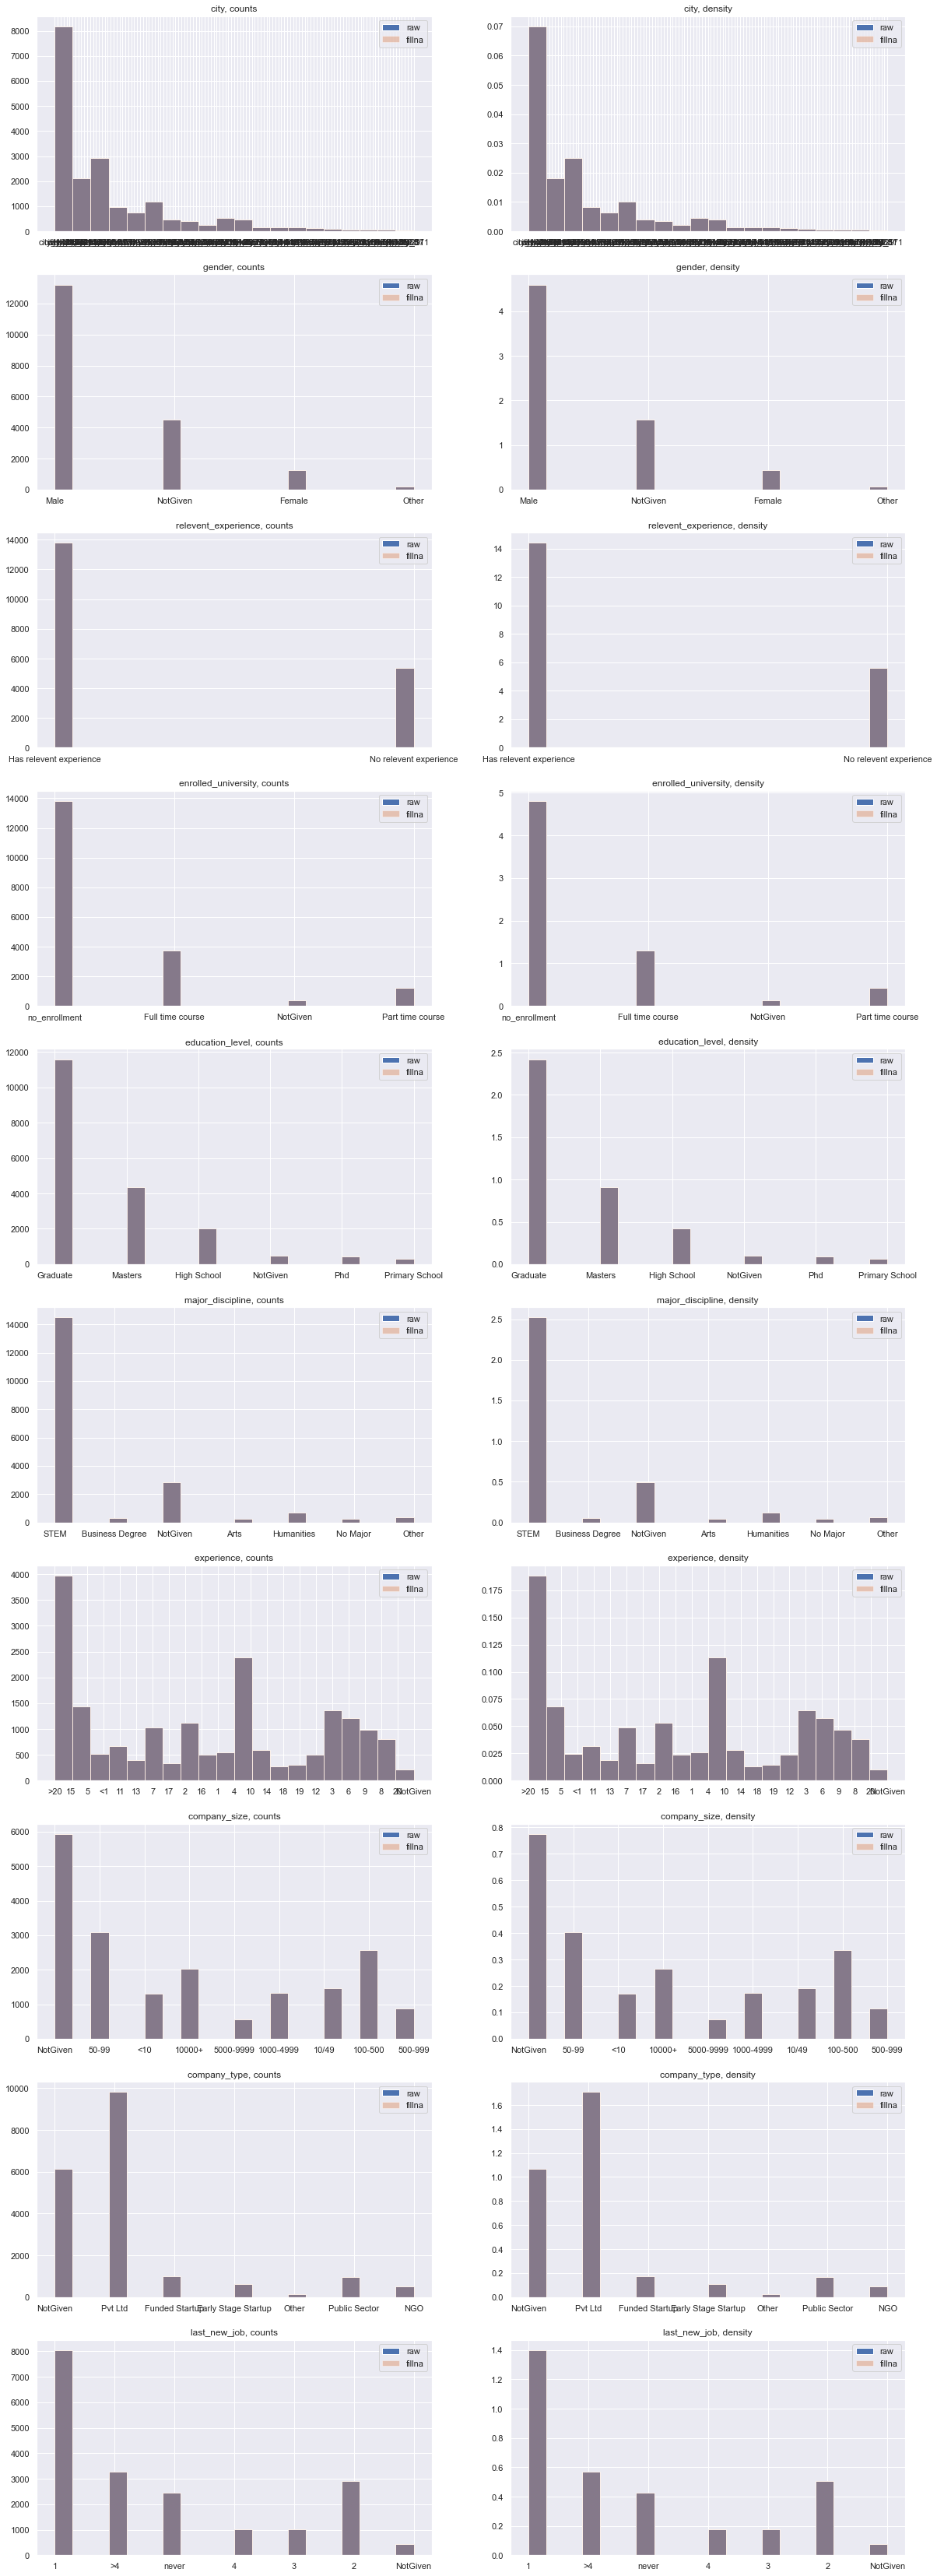

In [24]:
fig, axs = plt.subplots(10, 2, figsize=(20, 60))
axs = axs.ravel()

for idx, ax in enumerate(axs):
    if idx % 2:
        density = True
        hist_type = ', density'
    else: 
        density = False
        hist_type = ', counts'
    
    i = int(idx / 2) 
    ax.hist(X_hr[categorical[i]].fillna('NotGiven'), bins=20, label='raw', density=density)
    ax.hist(X_hr_fill[categorical[i]].dropna(), bins=20, label='fillna', density=density, alpha=.4)
    ax.set_title(categorical[i]+hist_type)
    ax.legend()
plt.show()

_Ваш ответ_ на этот раз почти не поменялись

### Задание 3  (1 балл)

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

In [25]:
# YOUR_CODE
X_covid.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...


In [26]:
X_covid.groupby('country').sum()[X_covid.groupby('country')['date'].nunique() == 46]

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
country,,,,,,,,,
Bahrain,4479558.0,4479558.0,0.0,121755.0,156122.0,263.27,263.27,0.0,91751.0


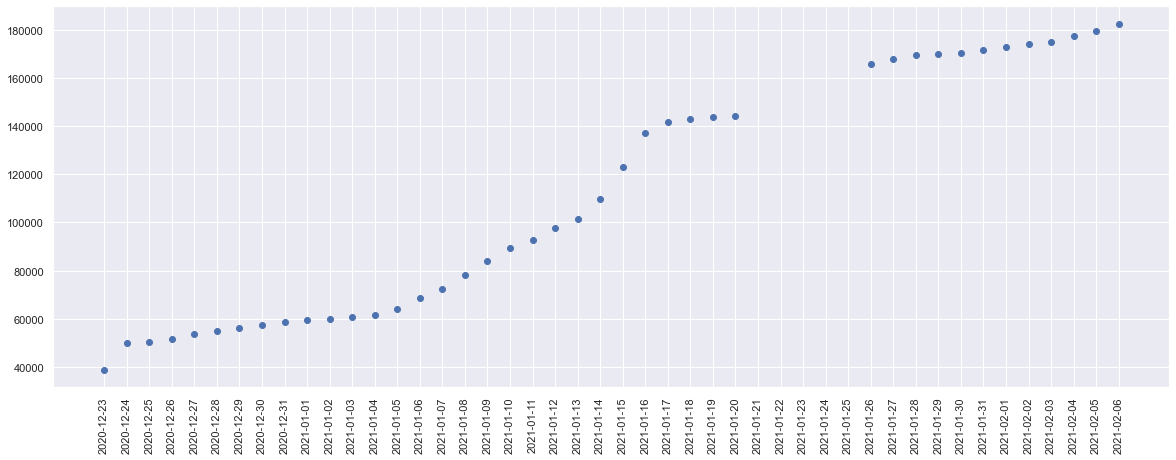

In [27]:
bahrain = X_covid[X_covid['country']=='Bahrain']
tot_vac = bahrain['total_vaccinations']
plt.figure(figsize=(20,7))
fig = plt.scatter(x=bahrain['date'], y=tot_vac)
plt.xticks(rotation=90)
plt.show()

Хочу использовать линейную регрессию, заметив, что даты идут подряд и без пропусков 

In [33]:
bahrain[['total_vaccinations', 'date']].index

Int64Index([ 78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
             91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
            104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
            117, 118, 119, 120, 121, 122, 123],
           dtype='int64')

In [34]:
from sklearn.linear_model import LinearRegression

X = [[106], [112]]
y = [[144130.0], [165953.0]]

lr = LinearRegression()
lr.fit(X, y)

bahrain['date_int'] = bahrain.index
pred = lr.predict(bahrain['date_int'].values.reshape(-1, 1))

/Users/f/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Посмотрим как это выглядит

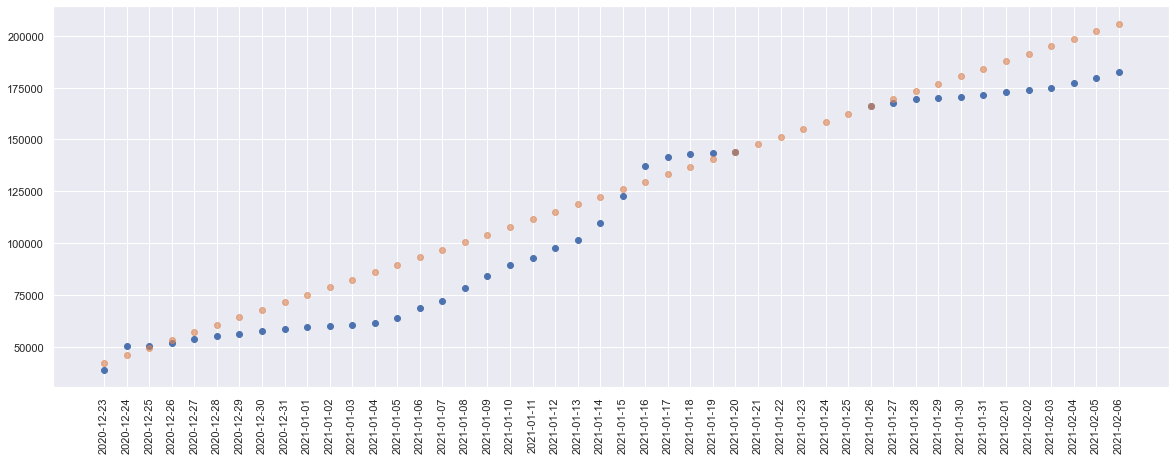

In [35]:
tot_vac = bahrain['total_vaccinations']
plt.figure(figsize=(20,7))
fig = plt.scatter(x=bahrain['date'], y=tot_vac)
plt.scatter(x=bahrain['date'], y=pred, alpha=0.6)
plt.xticks(rotation=90)
plt.show()

Теперь заполним пропуски

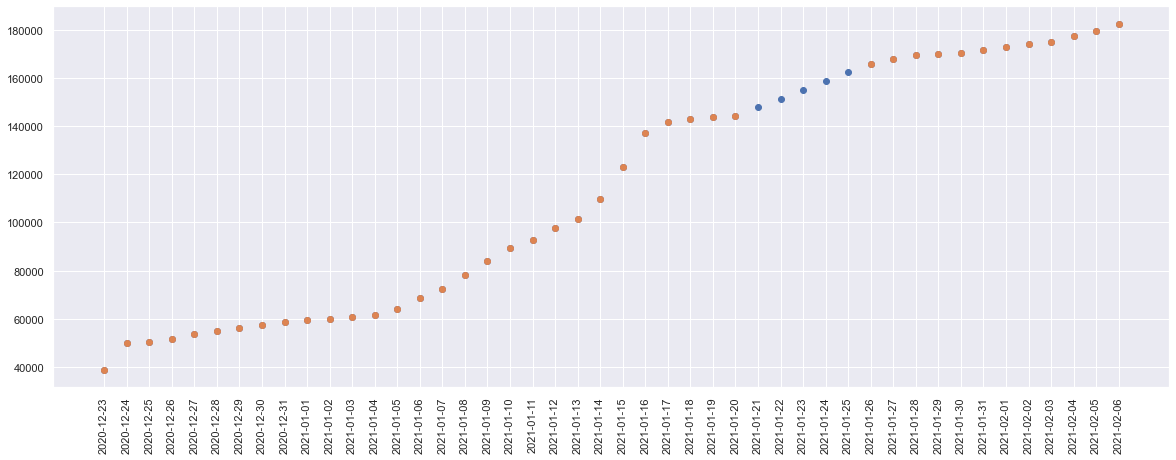

/Users/f/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [36]:
masked_total_vaccinations = bahrain['total_vaccinations'].isna() * pred.reshape(1, -1)[0]
filled = bahrain['total_vaccinations'].fillna(0) + masked_total_vaccinations
plt.figure(figsize=(20,7))
plt.scatter(x=bahrain['date'], y=filled)
fig = plt.scatter(x=bahrain['date'], y=tot_vac)
plt.xticks(rotation=90)
plt.show()

X_covid[X_covid['country']=='Bahrain']['total_vaccinations'] = filled

_Ваш ответ_ только Бахрейн, `total_vaccinations` монотонно растет, так что забить пропуски константой (например медианой) значило бы потерять информацию о тренде, поэтому я выбрал простую модель линейной интерполяции

### Задание  4 (0.5 балла)
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


In [37]:
X_hr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8


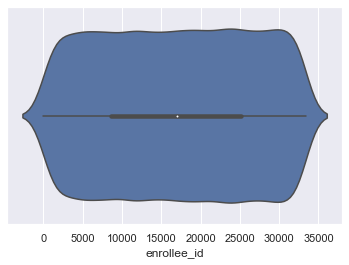

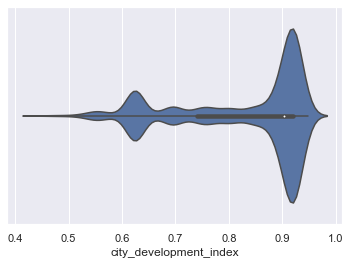

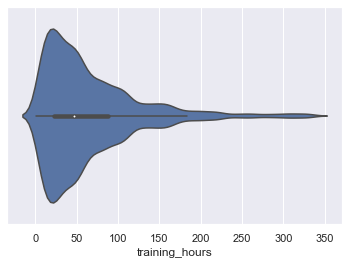

In [38]:
for feature in numeric_features: 
    sns.violinplot(x=X_hr[feature])
    plt.show()

Вообще не похоже на выбросы

_Ваш ответ_

### Задание  5 (1 балл)
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)


> я разбил категориальные признаки так:

In [39]:
frequency_features = ['city']
ranked_features = ['experience', 'company_size', 'last_new_job']
ohe_features = ['gender', 'relevent_experience', 'enrolled_university', 'company_type']

In [63]:
def encode(X):
    # Возвращает данные без категориальных признаков
    X_buf = X.copy()
    
    frequency_features = ['city']
    ranked_features = ['experience', 'company_size', 'last_new_job']
    ohe_features = ['gender', 'relevent_experience', 'enrolled_university', 'company_type']
    
    experience_d = {str(i): i for i in range(22)}
    experience_d['>20'] = experience_d.pop('21')
    experience_d['<1'] = experience_d.pop('0')
    
    company_size_d = {'<10': 10,
                      '10/49': 50,
                      '50-99': 100,
                      '100-500': 500,
                      '500-999': 1000,
                      '1000-4999': 5000,
                      '5000-9999': 10000,
                      '10000+': 50000
                      }
    
    last_new_job_d = {str(i): i for i in range(6)}
    last_new_job_d['>4'] = last_new_job_d.pop('5')
    last_new_job_d['never'] = last_new_job_d.pop('0')
    
    city_d = (X_buf.city.value_counts() / len(X_buf)).to_dict()
    
    enc_dicts = [experience_d, company_size_d, last_new_job_d, city_d]
    enc_features = ['experience', 'company_size', 'last_new_job', 'city']
    
    for feature, enc_dict in zip(enc_features, enc_dicts):
        enc_dict['NotGiven'] = 0
        X_buf[feature] = X_buf[feature].apply(lambda x: enc_dict[x])
    
    X_freq = X_buf[frequency_features]
    X_rank = X_buf[ranked_features]
    X_ohe = pd.get_dummies(X_buf[ohe_features], drop_first=True)
    
    X_encode = pd.concat([X_freq, X_rank, X_ohe], axis=1)
    
    return X_encode

In [64]:
X_hr_encode = encode(X_hr_fill)

_Ваш ответ_ неранжированные признаки старался кодировать ohe, если того позволяло число значений - слишком много было только в городах. ранговые признаки перевел в численные лейбелами, города - частотой 

### Задание  6 (1 балл)
Выполните задание для датасета _hr_.




#### 1.  (1 балл)
Реализуйте функцию undersampling

#### 2.  (1 балл)
Реализуйте функцию oversampling

In [65]:
y_hr.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [66]:
import scipy.stats as sps

def undersampling(X, y):
    # Возвращает данные, сбалансированные методом undersampling
    zeros_len = int(len(y) - y.sum())
    ones_len = int(y.sum())

    x_mask = np.full(zeros_len, False, dtype=bool)
    x_mask[:ones_len] = True
    np.random.shuffle(x_mask)

    X_class_zero = X[y == 0][x_mask]
    X_class_one = X[y == 1]

    df = pd.concat([X_class_zero, X_class_one])
    df['target'] = np.concatenate([np.zeros(ones_len), np.ones(ones_len)])
    df = df.sort_index()

    y_under = df['target']
    X_under = df.drop(columns='target')
    return X_under, y_under

def oversampling(X, y):
    # Возвращает данные, сбалансированные методом oversampling
    zeros_len = int(len(y) - y.sum())
    ones_len = int(y.sum())
    
    X_class_zero = X[y == 0]
    X_class_one = X[y == 1]
    ids = np.random.choice(np.arange(ones_len), size=zeros_len)
    X_class_one = X_class_one.iloc[ids]

    df = pd.concat([X_class_zero, X_class_one])
    df['target'] = np.concatenate([np.zeros(zeros_len), np.ones(zeros_len)])
    df = df.sort_index()

    y_over = df['target']
    X_over = df.drop(columns='target')
    
    return X_over, y_over

In [68]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_fill)

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_fill)

#### 3.  (1 балл)
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [69]:
!pip install -U imbalanced-learn

In [70]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_hr_SMOTE, y_hr_SMOTE = smote.fit_resample(X_hr_encode, y_hr_fill)

#### 4. (0.5 балла)
Как изменились распределения признаков при различных тактиках балансирования датасета?

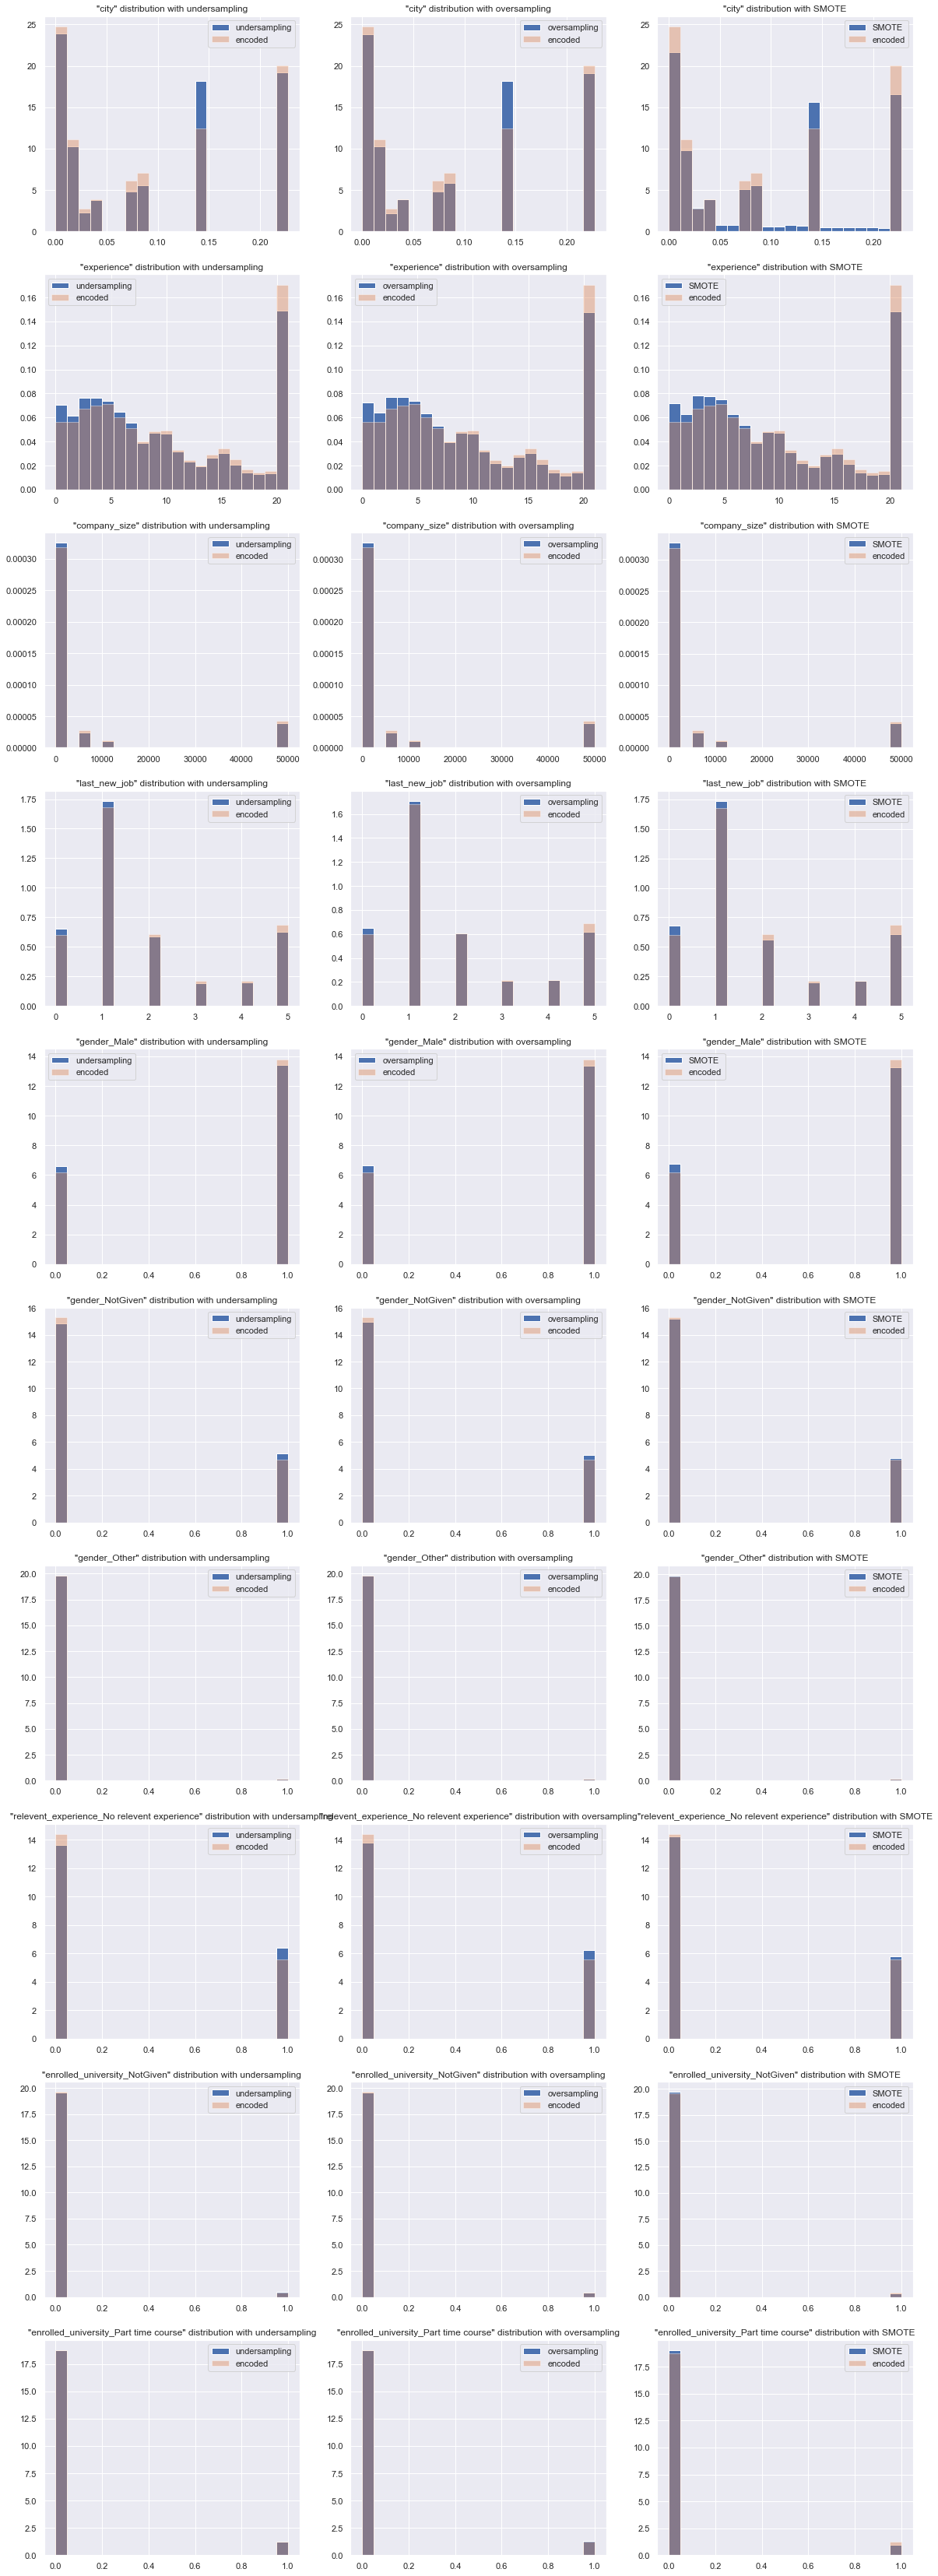

In [77]:
# YOUR CODE
fig, axs = plt.subplots(10, 3, figsize=(20, 60))
axs = axs.ravel()
encoded_features = X_hr_encode.columns

for idx, ax in enumerate(axs):
    if idx % 3 == 0:
        X_plot = X_hr_under
        hist_title = 'undersampling'
    elif idx % 3 == 1: 
        X_plot = X_hr_over
        hist_title = 'oversampling'
    else: 
        X_plot = X_hr_SMOTE
        hist_title = 'SMOTE'
    
    i = int(idx / 3) 
    ax.hist(X_plot[encoded_features[i]].dropna(), bins=20, label=hist_title, density=True)
    ax.hist(X_hr_encode[encoded_features[i]].dropna(), bins=20, label='encoded', density=True, alpha=.4)
    ax.set_title('"'+encoded_features[i]+'" distribution with '+hist_title)
    ax.legend()
plt.show()

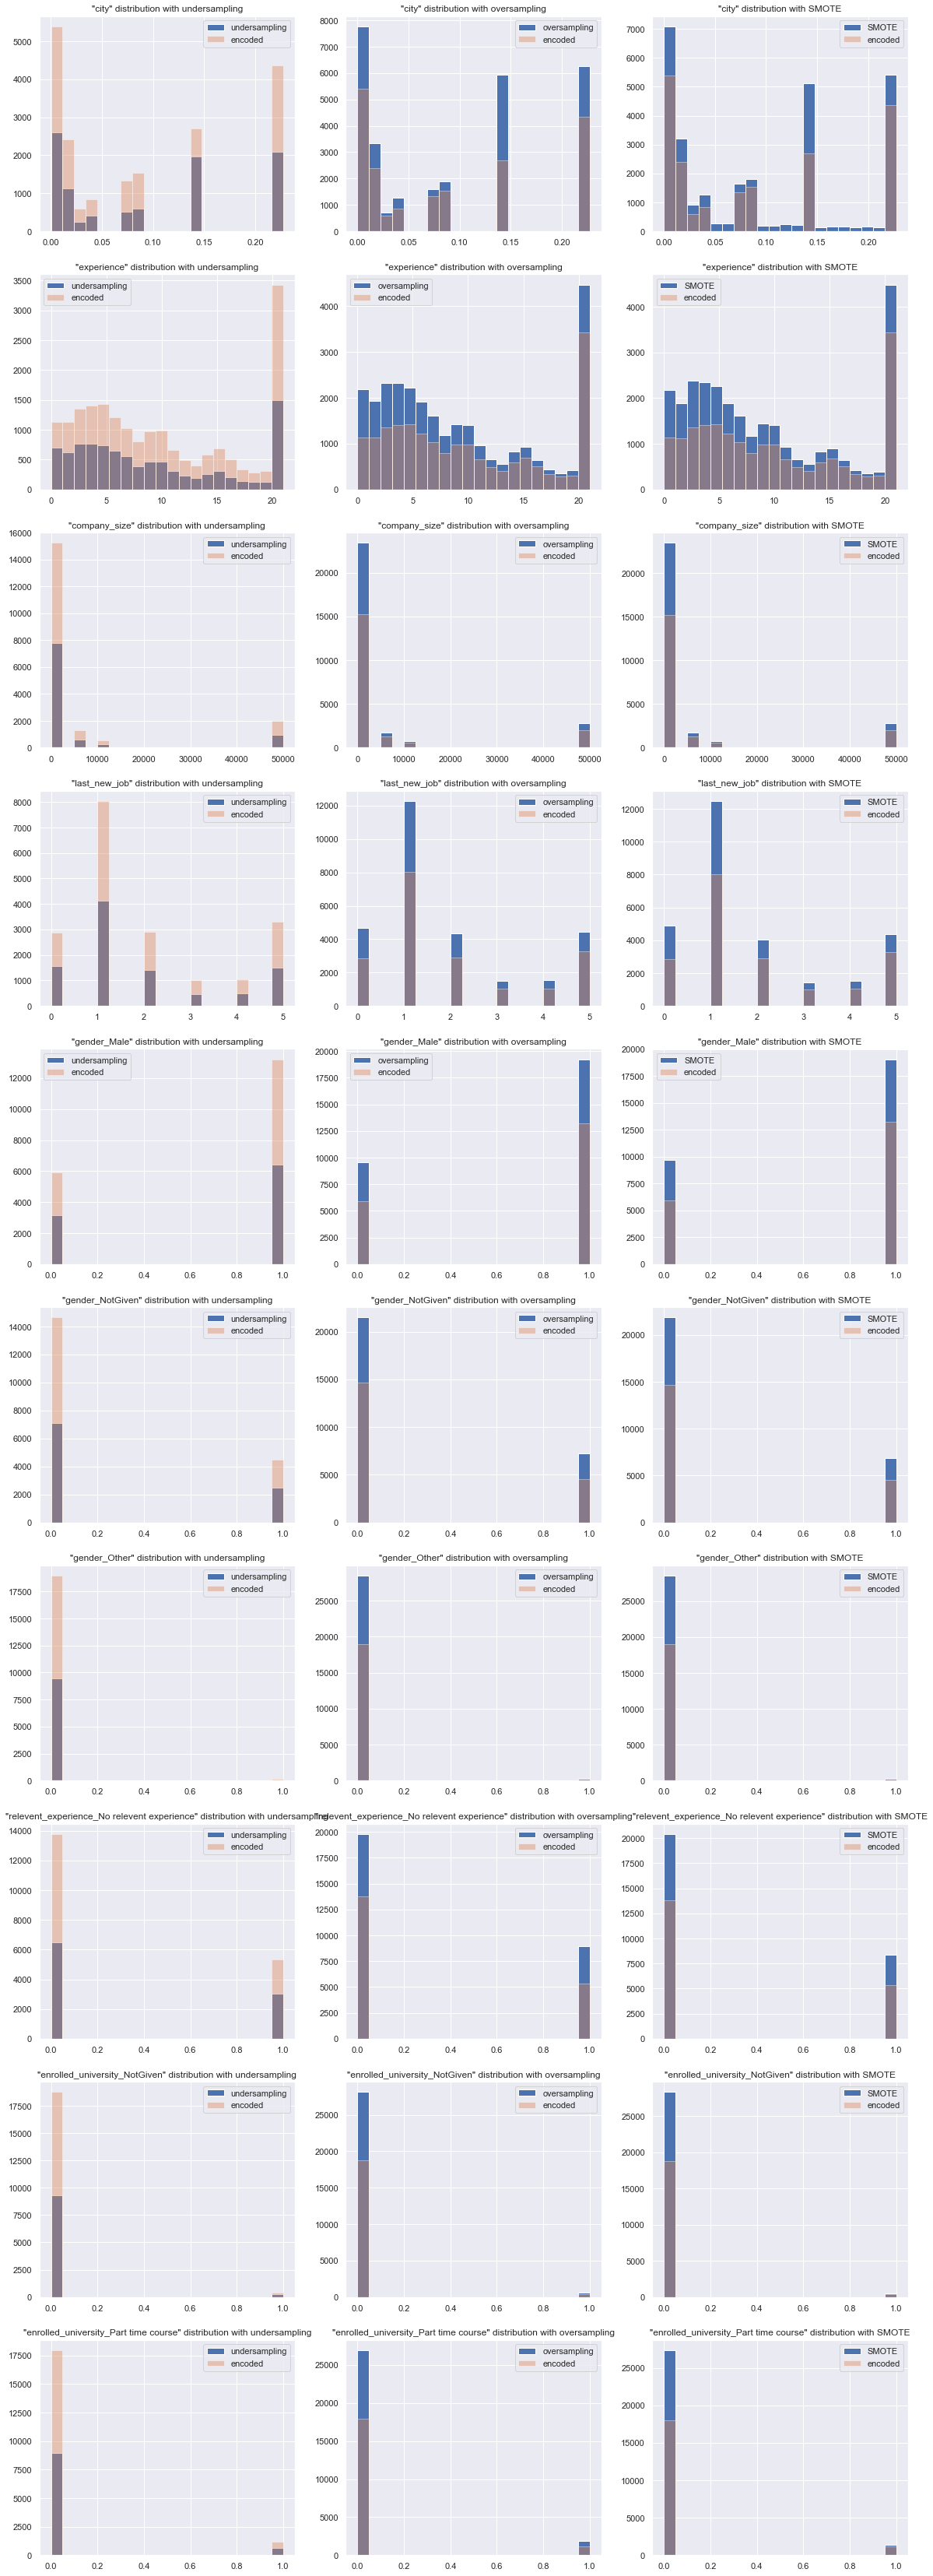

In [78]:
# YOUR CODE
fig, axs = plt.subplots(10, 3, figsize=(20, 60))
axs = axs.ravel()
encoded_features = X_hr_encode.columns

for idx, ax in enumerate(axs):
    if idx % 3 == 0:
        X_plot = X_hr_under
        hist_title = 'undersampling'
    elif idx % 3 == 1: 
        X_plot = X_hr_over
        hist_title = 'oversampling'
    else: 
        X_plot = X_hr_SMOTE
        hist_title = 'SMOTE'
    
    i = int(idx / 3) 
    ax.hist(X_plot[encoded_features[i]].dropna(), bins=20, label=hist_title, density=False)
    ax.hist(X_hr_encode[encoded_features[i]].dropna(), bins=20, label='encoded', density=False, alpha=.4)
    ax.set_title('"'+encoded_features[i]+'" distribution with '+hist_title)
    ax.legend()
plt.show()

_Ваш ответ_ по плотности практически не меняется, а по количеству закономерно увеличивается или уменьшается в зависимости от выбранного подхода